# Salary Prediction & Analysis - US

# 1 Problem Statement

This project understands the inticacies and relationships between dependent and independent variables that exists in data science jobs. This data is from kaggle, the goal is to predict salary.

# 2 Data Collection

Data source - https://www.kaggle.com/datasets/ruchi798/data-science-job-salaries
12 Columns and 606 records


About the Dataset

work_year: The year the salary was paid.

experience_level: The experience level in the job during the year with the following possible values
EN Entry-level
MI Junior Mid-level
SE Intermediate Senior-level
EX Expert Executive-level / Director
employment_type: The type of employment for the role
PT Part-time
FT Full-time
CT Contract
FL Freelance

job_title: The role worked in during the year.

salary: The total gross salary amount paid.

salary_currency: The currency of the salary paid as an ISO 4217 currency code.

salary_in_usd: The salary in USD (FX rate divided by avg. USD rate for the respective year via fxdata.foorilla.com.

employee_residence: Employee's primary country of residence in during the work year as an ISO 3166 country code.

remote_ratio: The overall amount of work done remotely, possible values are as follows
0 No remote work (less than 20%)
50 Partially remote
100 Fully remote (more than 80%)

company_location: The country of the employer's main office or contracting branch as an ISO 3166 country code.

company_size: The average number of people that worked for the company during the year
S less than 50 employees (small)
M 50 to 250 employees (medium)
L more than 250 employees (large)

* Import libraries

In [55]:
# libraries for Data Manipulation
import pandas as pd
import numpy as np

# libraies for Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import plotly.express as px
from matplotlib.colors import ListedColormap
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.colors as colors
import matplotlib.colors as mcolors

# libraries for Machine Learning
from sklearn.preprocessing import OrdinalEncoder
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

from scipy.stats import shapiro
from scipy.stats import levene
from scipy.stats import ttest_ind
from scipy.stats import f_oneway

import warnings
warnings.filterwarnings('ignore')

# Load Dataset

In [56]:
O_df = pd.read_csv('data/ds_salaries.csv')

In [57]:
O_df.shape

(607, 12)

In [58]:
O_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


In [59]:
O_df

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...,...
602,602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


Let’s describe some of the categorical variables in the jobs dataset:

In [60]:
def calculate_frequency(df, column):
    """
    This function calculates the frequency, proportion, and percentage 
    of each unique value in a specified column of a DataFrame.

    Parameters:
    df (pandas.DataFrame): The DataFrame to analyze.
    column (str): The name of the column to analyze.

    Returns:
    freq (pandas.DataFrame): A DataFrame with each row representing a unique value 
                             from the input column, and the columns 'frequency', 
                             'proportion', and 'percentage' showing the frequency, 
                             proportion, and percentage of each value respectively.
    """
    
    # Calculate the frequency of each unique value in the column
    freq = df[column].value_counts().reset_index()
    freq.columns = [column, 'frequency']  # Renaming the columns appropriately

    # Calculate the total number of values in the column
    total = df[column].count()

    # Calculate the proportion of each value and round to 2 decimal places
    freq['proportion'] = (freq['frequency'] / total).round(2)

    # Convert the proportion to a percentage and round to 2 decimal places
    freq['percentage'] = (freq['proportion'] * 100).round(2)

    return freq


In [61]:
freq = calculate_frequency(O_df, 'job_title')
freq.head(44)

,job_title,frequency,proportion,percentage
0,Data Scientist,143,0.24,24.0
1,Data Engineer,132,0.22,22.0
2,Data Analyst,97,0.16,16.0
3,Machine Learning Engineer,41,0.07,7.0
4,Research Scientist,16,0.03,3.0
5,Data Science Manager,12,0.02,2.0
6,Data Architect,11,0.02,2.0
7,Big Data Engineer,8,0.01,1.0
8,Machine Learning Scientist,8,0.01,1.0
9,Principal Data Scientist,7,0.01,1.0


In [62]:
# Copy the dataset

df = O_df.copy()

In [63]:
# Drop Unnamed: 0, salary, and salary currency, as we have salary in usd

df.drop(['Unnamed: 0', 'salary', 'salary_currency'], axis=1, inplace=True)
df.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,US,50,US,L


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary_in_usd       607 non-null    int64 
 5   employee_residence  607 non-null    object
 6   remote_ratio        607 non-null    int64 
 7   company_location    607 non-null    object
 8   company_size        607 non-null    object
dtypes: int64(3), object(6)
memory usage: 42.8+ KB


7 Check Missing Values

In [65]:
df.isna().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

There're no missing values in the dataset

Check Duplicates

In [66]:
duplicate_rows_df = df[df.duplicated(keep=False)]

In [67]:
df.duplicated().sum()

42

There're 42 duplicate records in the dataset. So, I'm dropping these duplicates

In [68]:
df = df.drop_duplicates()

In [69]:
df.duplicated().sum()

0

In [70]:
duplicate_rows_df = df[df.duplicated(keep=False)]
duplicate_rows_df.head(50)

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 565 entries, 0 to 606
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           565 non-null    int64 
 1   experience_level    565 non-null    object
 2   employment_type     565 non-null    object
 3   job_title           565 non-null    object
 4   salary_in_usd       565 non-null    int64 
 5   employee_residence  565 non-null    object
 6   remote_ratio        565 non-null    int64 
 7   company_location    565 non-null    object
 8   company_size        565 non-null    object
dtypes: int64(3), object(6)
memory usage: 44.1+ KB


Check unique values for each column

In [72]:
df.nunique()

work_year               3
experience_level        4
employment_type         4
job_title              50
salary_in_usd         369
employee_residence     57
remote_ratio            3
company_location       50
company_size            3
dtype: int64

Check statistics of our numerical variables

In [73]:
df.describe()

,work_year,salary_in_usd,remote_ratio
count,565.000000,565.000000,565.000000
mean,2021.364602,110610.343363,69.911504
std,0.698138,72280.702792,40.900666
min,2020.000000,2859.000000,0.000000
25%,2021.000000,60757.000000,50.000000
50%,2021.000000,100000.000000,100.000000
75%,2022.000000,150000.000000,100.000000
max,2022.000000,600000.000000,100.000000


work_year: The dataset contains data from the years 2020 and 2022, with a mean year of approximately 2021. This suggests that the majority of your data is quite recent. The small standard deviation (0.69) suggests that the years in your dataset are close to the mean year and there isn't a significant spread in the years.

salary_in_usd: The mean salary is approximately 110,610 USD, but the standard deviation is quite large (72,280 USD), indicating a wide spread in salaries. The minimum salary is 2,859 USD, and the maximum salary is 600,000 USD, which is a large range, suggesting a high variability in the salaries. The 25th percentile (first quartile) is 60,757 USD, the 50th percentile (median) is 100,000 USD, and the 75th percentile (third quartile) is 150,000 USD. This means that 50% of the workers earn between 60,757 and 150,000 USD.

remote_ratio: The mean remote ratio is approximately 69.9%, indicating that on average, workers spend about 70% of their time working remotely. The standard deviation is quite large (40.9), suggesting a wide spread in the remote working ratios. The minimum remote ratio is 0% (indicating that some workers don't work remotely at all), and the maximum remote ratio is 100% (indicating that some workers work remotely all the time). The 25th, 50th, and 75th percentiles are all 50% or higher, suggesting that at least 75% of workers spend half or more of their time working remotely.

# Exploring Data

In [74]:
# Outline of the dataset

# Print the number of records and columns
print(f"There are {len(df)} records and {len(df.columns)} features/columns/attributes")

# Define the numeric features
numeric_features = ['work_year', 'salary_in_usd', 'remote_ratio']

# Define the categorical features
categorical_features = [col for col in df.columns if col not in numeric_features]

print(f"\nThere are {len(numeric_features)} numerical attributes:")
for i, feature in enumerate(numeric_features, 1):
    print(f"{i}. {feature}")

print(f"\nThere are {len(categorical_features)} categorical attributes:")
for i, feature in enumerate(categorical_features, 1):
    print(f"{i}. {feature}")



There are 565 records and 9 features/columns/attributes

There are 3 numerical attributes:
1. work_year
2. salary_in_usd
3. remote_ratio

There are 6 categorical attributes:
1. experience_level
2. employment_type
3. job_title
4. employee_residence
5. company_location
6. company_size


In [75]:
# let's review the first five rows, last five rows, and random sample of 30 records.
df.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,US,50,US,L


In [76]:
df.tail()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
602,2022,SE,FT,Data Engineer,154000,US,100,US,M
603,2022,SE,FT,Data Engineer,126000,US,100,US,M
604,2022,SE,FT,Data Analyst,129000,US,0,US,M
605,2022,SE,FT,Data Analyst,150000,US,100,US,M
606,2022,MI,FT,AI Scientist,200000,IN,100,US,L


In [77]:
df.sample(44)

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
505,2022,EN,FT,Data Scientist,86703,AU,50,AU,M
276,2021,EN,FT,Data Scientist,58000,US,50,US,L
137,2021,MI,FT,ML Engineer,77364,JP,50,JP,S
238,2021,EN,FT,Data Scientist,4000,VN,0,VN,M
453,2022,MI,FT,Machine Learning Engineer,120000,US,100,US,S
59,2020,MI,FT,Data Scientist,138350,US,100,US,M
543,2022,MI,FT,Data Engineer,99100,US,0,US,M
272,2021,EN,FT,Data Science Consultant,76833,DE,0,DE,L
327,2022,EX,FT,Data Analyst,110000,US,100,US,M
380,2022,SE,FT,Data Engineer,136994,US,100,US,M


Let's see how many unique values ar ein each categrical variable using the set() method

In [78]:
set(df['work_year'].to_list())

{2020, 2021, 2022}

In [79]:
set(df['experience_level'].to_list())

{'EN', 'EX', 'MI', 'SE'}

In [80]:
set(df['employment_type'].to_list())

{'CT', 'FL', 'FT', 'PT'}

In [81]:
set(df['company_size'].to_list())

{'L', 'M', 'S'}

In [82]:
set(df['employee_residence'].to_list())

{'AE',
 'AR',
 'AT',
 'AU',
 'BE',
 'BG',
 'BO',
 'BR',
 'CA',
 'CH',
 'CL',
 'CN',
 'CO',
 'CZ',
 'DE',
 'DK',
 'DZ',
 'EE',
 'ES',
 'FR',
 'GB',
 'GR',
 'HK',
 'HN',
 'HR',
 'HU',
 'IE',
 'IN',
 'IQ',
 'IR',
 'IT',
 'JE',
 'JP',
 'KE',
 'LU',
 'MD',
 'MT',
 'MX',
 'MY',
 'NG',
 'NL',
 'NZ',
 'PH',
 'PK',
 'PL',
 'PR',
 'PT',
 'RO',
 'RS',
 'RU',
 'SG',
 'SI',
 'TN',
 'TR',
 'UA',
 'US',
 'VN'}

In [83]:
set(df['company_location'].to_list())

{'AE',
 'AS',
 'AT',
 'AU',
 'BE',
 'BR',
 'CA',
 'CH',
 'CL',
 'CN',
 'CO',
 'CZ',
 'DE',
 'DK',
 'DZ',
 'EE',
 'ES',
 'FR',
 'GB',
 'GR',
 'HN',
 'HR',
 'HU',
 'IE',
 'IL',
 'IN',
 'IQ',
 'IR',
 'IT',
 'JP',
 'KE',
 'LU',
 'MD',
 'MT',
 'MX',
 'MY',
 'NG',
 'NL',
 'NZ',
 'PK',
 'PL',
 'PT',
 'RO',
 'RU',
 'SG',
 'SI',
 'TR',
 'UA',
 'US',
 'VN'}

In [84]:
set(df['job_title'].to_list())

{'3D Computer Vision Researcher',
 'AI Scientist',
 'Analytics Engineer',
 'Applied Data Scientist',
 'Applied Machine Learning Scientist',
 'BI Data Analyst',
 'Big Data Architect',
 'Big Data Engineer',
 'Business Data Analyst',
 'Cloud Data Engineer',
 'Computer Vision Engineer',
 'Computer Vision Software Engineer',
 'Data Analyst',
 'Data Analytics Engineer',
 'Data Analytics Lead',
 'Data Analytics Manager',
 'Data Architect',
 'Data Engineer',
 'Data Engineering Manager',
 'Data Science Consultant',
 'Data Science Engineer',
 'Data Science Manager',
 'Data Scientist',
 'Data Specialist',
 'Director of Data Engineering',
 'Director of Data Science',
 'ETL Developer',
 'Finance Data Analyst',
 'Financial Data Analyst',
 'Head of Data',
 'Head of Data Science',
 'Head of Machine Learning',
 'Lead Data Analyst',
 'Lead Data Engineer',
 'Lead Data Scientist',
 'Lead Machine Learning Engineer',
 'ML Engineer',
 'Machine Learning Developer',
 'Machine Learning Engineer',
 'Machine Lear

Observation

Abbreviated values is confusing, we'll replace with full words for clearer understanding and visualization

In [85]:
# Experience Level
# EN - Junior
# MI - Intermediate
# SE - Senior
# EX - Executive

df['experience_level'] = df['experience_level'].replace(['EN', 'MI', 'SE', 'EX'], ['Junior', 'Intermediate', 'Senior', 'Executive'])

# Employment type
df['employment_type'] = df['employment_type'].replace(['PT', 'FT', 'CT', 'FL'], ['Part Time', 'Full Time', 'Contract', 'Freelance'])

# Remote ratio
df['remote_ratio'] = df['remote_ratio'].replace([100, 50, 0], ['Fully Remote', 'Partially Remote', 'On Site'])
df['remote_ratio'] = df['remote_ratio'].astype(object)

# Company Size
df['company_size'] = df['company_size'].replace(['L', 'M', 'S'], ['Large', 'Medium', 'Small'])

#Employee Residence & Company location
##ISO code

ISO3166 = {
	'AD': 'Andorra',
	'AE': 'United Arab Emirates',
	'AF': 'Afghanistan',
	'AG': 'Antigua & Barbuda',
	'AI': 'Anguilla',
	'AL': 'Albania',
	'AM': 'Armenia',
	'AN': 'Netherlands Antilles',
	'AO': 'Angola',
	'AQ': 'Antarctica',
	'AR': 'Argentina',
	'AS': 'American Samoa',
	'AT': 'Austria',
	'AU': 'Australia',
	'AW': 'Aruba',
	'AZ': 'Azerbaijan',
	'BA': 'Bosnia and Herzegovina',
	'BB': 'Barbados',
	'BD': 'Bangladesh',
	'BE': 'Belgium',
	'BF': 'Burkina Faso',
	'BG': 'Bulgaria',
	'BH': 'Bahrain',
	'BI': 'Burundi',
	'BJ': 'Benin',
	'BM': 'Bermuda',
	'BN': 'Brunei Darussalam',
	'BO': 'Bolivia',
	'BR': 'Brazil',
	'BS': 'Bahama',
	'BT': 'Bhutan',
	'BU': 'Burma (no longer exists)',
	'BV': 'Bouvet Island',
	'BW': 'Botswana',
	'BY': 'Belarus',
	'BZ': 'Belize',
	'CA': 'Canada',
	'CC': 'Cocos (Keeling) Islands',
	'CF': 'Central African Republic',
	'CG': 'Congo',
	'CH': 'Switzerland',
	'CI': 'Côte D\'ivoire (Ivory Coast)',
	'CK': 'Cook Iislands',
	'CL': 'Chile',
	'CM': 'Cameroon',
	'CN': 'China',
	'CO': 'Colombia',
	'CR': 'Costa Rica',
	'CS': 'Czechoslovakia (no longer exists)',
	'CU': 'Cuba',
	'CV': 'Cape Verde',
	'CX': 'Christmas Island',
	'CY': 'Cyprus',
	'CZ': 'Czech Republic',
	'DD': 'German Democratic Republic (no longer exists)',
	'DE': 'Germany',
	'DJ': 'Djibouti',
	'DK': 'Denmark',
	'DM': 'Dominica',
	'DO': 'Dominican Republic',
	'DZ': 'Algeria',
	'EC': 'Ecuador',
	'EE': 'Estonia',
	'EG': 'Egypt',
	'EH': 'Western Sahara',
	'ER': 'Eritrea',
	'ES': 'Spain',
	'ET': 'Ethiopia',
	'FI': 'Finland',
	'FJ': 'Fiji',
	'FK': 'Falkland Islands (Malvinas)',
	'FM': 'Micronesia',
	'FO': 'Faroe Islands',
	'FR': 'France',
	'FX': 'France, Metropolitan',
	'GA': 'Gabon',
	'GB': 'United Kingdom (Great Britain)',
	'GD': 'Grenada',
	'GE': 'Georgia',
	'GF': 'French Guiana',
	'GH': 'Ghana',
	'GI': 'Gibraltar',
	'GL': 'Greenland',
	'GM': 'Gambia',
	'GN': 'Guinea',
	'GP': 'Guadeloupe',
	'GQ': 'Equatorial Guinea',
	'GR': 'Greece',
	'GS': 'South Georgia and the South Sandwich Islands',
	'GT': 'Guatemala',
	'GU': 'Guam',
	'GW': 'Guinea-Bissau',
	'GY': 'Guyana',
	'HK': 'Hong Kong',
	'HM': 'Heard & McDonald Islands',
	'HN': 'Honduras',
	'HR': 'Croatia',
	'HT': 'Haiti',
	'HU': 'Hungary',
	'ID': 'Indonesia',
	'IE': 'Ireland',
	'IL': 'Israel',
	'IN': 'India',
	'IO': 'British Indian Ocean Territory',
	'IQ': 'Iraq',
	'IR': 'Islamic Republic of Iran',
	'IS': 'Iceland',
	'IT': 'Italy',
	'JM': 'Jamaica',
	'JO': 'Jordan',
	'JP': 'Japan',
	'KE': 'Kenya',
	'KG': 'Kyrgyzstan',
	'KH': 'Cambodia',
	'KI': 'Kiribati',
	'KM': 'Comoros',
	'KN': 'St. Kitts and Nevis',
	'KP': 'Korea, Democratic People\'s Republic of',
	'KR': 'Korea, Republic of',
	'KW': 'Kuwait',
	'KY': 'Cayman Islands',
	'KZ': 'Kazakhstan',
	'LA': 'Lao People\'s Democratic Republic',
	'LB': 'Lebanon',
	'LC': 'Saint Lucia',
	'LI': 'Liechtenstein',
	'LK': 'Sri Lanka',
	'LR': 'Liberia',
	'LS': 'Lesotho',
	'LT': 'Lithuania',
	'LU': 'Luxembourg',
	'LV': 'Latvia',
	'LY': 'Libyan Arab Jamahiriya',
	'MA': 'Morocco',
	'MC': 'Monaco',
	'MD': 'Moldova, Republic of',
	'MG': 'Madagascar',
	'MH': 'Marshall Islands',
	'ML': 'Mali',
	'MN': 'Mongolia',
	'MM': 'Myanmar',
	'MO': 'Macau',
	'MP': 'Northern Mariana Islands',
	'MQ': 'Martinique',
	'MR': 'Mauritania',
	'MS': 'Monserrat',
	'MT': 'Malta',
	'MU': 'Mauritius',
	'MV': 'Maldives',
	'MW': 'Malawi',
	'MX': 'Mexico',
	'MY': 'Malaysia',
	'MZ': 'Mozambique',
	'NA': 'Namibia',
	'NC': 'New Caledonia',
	'NE': 'Niger',
	'NF': 'Norfolk Island',
	'NG': 'Nigeria',
	'NI': 'Nicaragua',
	'NL': 'Netherlands',
	'NO': 'Norway',
	'NP': 'Nepal',
	'NR': 'Nauru',
	'NT': 'Neutral Zone (no longer exists)',
	'NU': 'Niue',
	'NZ': 'New Zealand',
	'OM': 'Oman',
	'PA': 'Panama',
	'PE': 'Peru',
	'PF': 'French Polynesia',
	'PG': 'Papua New Guinea',
	'PH': 'Philippines',
	'PK': 'Pakistan',
	'PL': 'Poland',
	'PM': 'St. Pierre & Miquelon',
	'PN': 'Pitcairn',
	'PR': 'Puerto Rico',
	'PT': 'Portugal',
	'PW': 'Palau',
	'PY': 'Paraguay',
	'QA': 'Qatar',
	'RE': 'Réunion',
	'RO': 'Romania',
	'RU': 'Russian Federation',
	'RW': 'Rwanda',
	'SA': 'Saudi Arabia',
	'SB': 'Solomon Islands',
	'SC': 'Seychelles',
	'SD': 'Sudan',
	'SE': 'Sweden',
	'SG': 'Singapore',
	'SH': 'St. Helena',
	'SI': 'Slovenia',
	'SJ': 'Svalbard & Jan Mayen Islands',
	'SK': 'Slovakia',
	'SL': 'Sierra Leone',
	'SM': 'San Marino',
	'SN': 'Senegal',
	'SO': 'Somalia',
	'SR': 'Suriname',
	'ST': 'Sao Tome & Principe',
	'SU': 'Union of Soviet Socialist Republics (no longer exists)',
	'SV': 'El Salvador',
	'SY': 'Syrian Arab Republic',
	'SZ': 'Swaziland',
	'TC': 'Turks & Caicos Islands',
	'TD': 'Chad',
	'TF': 'French Southern Territories',
	'TG': 'Togo',
	'TH': 'Thailand',
	'TJ': 'Tajikistan',
	'TK': 'Tokelau',
	'TM': 'Turkmenistan',
	'TN': 'Tunisia',
	'TO': 'Tonga',
	'TP': 'East Timor',
	'TR': 'Turkey',
	'TT': 'Trinidad & Tobago',
	'TV': 'Tuvalu',
	'TW': 'Taiwan, Province of China',
	'TZ': 'Tanzania, United Republic of',
	'UA': 'Ukraine',
	'UG': 'Uganda',
	'UM': 'United States Minor Outlying Islands',
	'US': 'United States of America',
	'UY': 'Uruguay',
	'UZ': 'Uzbekistan',
	'VA': 'Vatican City State (Holy See)',
	'VC': 'St. Vincent & the Grenadines',
	'VE': 'Venezuela',
	'VG': 'British Virgin Islands',
	'VI': 'United States Virgin Islands',
	'VN': 'Viet Nam',
	'VU': 'Vanuatu',
	'WF': 'Wallis & Futuna Islands',
	'WS': 'Samoa',
	'YD': 'Democratic Yemen (no longer exists)',
	'YE': 'Yemen',
	'YT': 'Mayotte',
	'YU': 'Yugoslavia',
	'ZA': 'South Africa',
	'ZM': 'Zambia',
	'ZR': 'Zaire',
	'ZW': 'Zimbabwe',
	'ZZ': 'Unknown or unspecified country',
}

df['employee_residence'] = df['employee_residence'].map(ISO3166)
df['company_location'] = df['company_location'].map(ISO3166)


In [86]:
freq = calculate_frequency(df, 'job_title')
freq.head(50)

,job_title,frequency,proportion,percentage
0,Data Scientist,130,0.23,23.0
1,Data Engineer,121,0.21,21.0
2,Data Analyst,82,0.15,15.0
3,Machine Learning Engineer,39,0.07,7.0
4,Research Scientist,16,0.03,3.0
5,Data Science Manager,12,0.02,2.0
6,Data Architect,11,0.02,2.0
7,Big Data Engineer,8,0.01,1.0
8,Machine Learning Scientist,8,0.01,1.0
9,Principal Data Scientist,7,0.01,1.0


📌 Observation

Upon inspecting the 'job_title' column in the dataset, it was found that there was a high level of granularity in the job titles. In other words, there were many different job titles that effectively represented similar roles. For example, 'Principal Data Scientist', 'Applied Data Scientist', 'Data Science Manager', and 'Lead Data Scientist' all fall under the broad category of 'Data Scientist' roles.

This high level of granularity in the job titles could potentially hinder a clear and comprehensive analysis of the data. For instance, if we were trying to understand the distribution of job postings across different roles, the multitude of job titles could lead to a fragmented view.

💡 Solution

To address this, we decided to create a mapping that would group similar job titles into broader categories. For instance, all data scientist roles, irrespective of seniority, were grouped under 'Data Scientist'. However, to maintain the distinction between individual contributor roles and managerial roles, we created separate categories for 'Data Science Manager', 'Data Engineering Manager', and 'Machine Learning Manager'.

For 'Data Analyst' roles, we grouped them into two categories - 'Data Analyst' for individual contributor roles and 'Data Analytics Manager' for managerial roles. Similarly, we grouped 'Data Engineer' roles into 'Data Engineer' and 'Data Engineering Manager' categories.

For specialist roles in machine learning, we created separate categories for 'Machine Learning Scientist', 'Machine Learning Engineer', and 'Machine Learning Manager'. We also created distinct categories for 'Data Architect', 'Computer Vision Engineer', 'NLP Engineer', 'AI Scientist', 'Research Scientist', and 'Applied Scientist'.

The mapping was applied to the 'job_title' column, effectively generalizing the job titles into more broad and analytically useful categories. This approach should provide a more clear and consolidated view of the job roles in the dataset, aiding in further analysis.

In [87]:
# Rows where 'job_title' is an empty string
missing_job_titles = df[df['job_title'].isna()]

# Print the rows with missing job titles
missing_job_titles

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size


In [88]:
# mapping the new classification type
employment_classification = {
    'Data Scientist':'Data Scientist',
    'Principal Data Scientist':'Data Scientist',
    'Applied Data Scientist':'Data Scientist',
    'Staff Data Scientist':'Data Scientist',
    'Lead Data Scientist':'Data Scientist',
    'Product Data Scientist':'Data Scientist',
    'Data Specialist':'Data Scientist',
    'Data Science Consultant': 'Data Scientist',

    'Data Science Manager':'Data Science Manager',
    'Head of Data Science':'Data Science Manager',
    'Director of Data Science':'Data Science Manager',
    'Data Scientist Lead':'Data Science Manager',
    'Data Science Lead':'Data Science Manager',
    'Head of Data': 'Data Science Manager',
    
    'Data Analyst':'Data Analyst',
    'Business Data Analyst':'Data Analyst',
    'BI Data Analyst':'Data Analyst',
    'Lead Data Analyst':'Data Analyst',
    'Data Analytics Engineer':'Data Analyst',
    'Marketing Data Analyst':'Data Analyst',
    'Financial Data Analyst':'Data Analyst',
    'Finance Data Analyst':'Data Analyst',
    'Principal Data Analyst':'Data Analyst',
    'Data Operations Analyst':'Data Analyst',
    'Power BI Developer':'Data Analyst',

    'Data Analytics Manager':'Data Analytics Manager',
    'Data Analytics Lead':'Data Analytics Manager',
    'Analytics Engineer':'Data Analytics Manager',
    'Data Analytics Consultant':'Data Analytics Manager',
    'Product Data Analyst':'Data Analytics Manager',

    'Data Engineer':'Data Engineer',
    'Big Data Engineer':'Data Engineer',
    'Principal Data Engineer':'Data Engineer',
    'Data Operations Engineer':'Data Engineer',
    'Lead Data Engineer':'Data Engineer',
    'ETL Developer':'Data Engineer',
    'Data Science Engineer': 'Data Engineer',

    'Data Engineering Manager':'Data Engineering Manager',
    'Director of Data Engineering':'Data Engineering Manager',
    'Cloud Data Engineer':'Data Engineering Manager',
    'Data Science Tech Lead':'Data Engineering Manager',
    'Data Manager':'Data Engineering Manager',
    
    'Machine Learning Scientist':'Machine Learning Scientist',
    'Applied Machine Learning Scientist':'Machine Learning Scientist',
    'Machine Learning Research Engineer':'Machine Learning Scientist',

    'Head of Machine Learning':'ML Manager',
    'Machine Learning Manager':'ML Manager',

    'Machine Learning Engineer':'Machine Learning Engineer',
    'Machine Learning Infrastructure Engineer':'Machine Learning Engineer',
    'ML Engineer':'Machine Learning Engineer',
    'Lead Machine Learning Engineer':'Machine Learning Engineer',
    'Machine Learning Developer':'Machine Learning Engineer',
    
    'Data Architect':'Data Architect',
    'Cloud Data Architect':'Data Architect',
    'Principal Data Architect':'Data Architect',
    'Big Data Architect':'Data Architect',
    
    'Computer Vision Engineer':'Computer Vision Engineer',
    'Computer Vision Software Engineer':'Computer Vision Engineer',
    '3D Computer Vision Researcher':'Computer Vision Engineer',
    
    'NLP Engineer':'NLP Engineer',
    'AI Scientist':'AI Scientist',
    'Research Scientist':'Research Scientist',
    'Applied Scientist':'Applied Scientist',
}

df['job_title'] = df['job_title'].map(employment_classification)

In [89]:
# # List of missing job ids
# missing_job_ids = [18, 36, 74, 91, 117, 155, 160, 163, 187, 199, 272, 286, 417, 490, 501]

# # Filter O_df using isin to get the rows with the missing job ids
# missing_jobs_df = O_df[O_df.index.isin(missing_job_ids)]

# # Print the missing job titles
# print(missing_jobs_df['job_title'])

In [90]:
# Rows where 'job_title' is an empty string
missing_job_titles = df[df['job_title'].isna()]

# Print the rows with missing job titles
missing_job_titles

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size


In [91]:
df['job_title']

0                  Data Scientist
1      Machine Learning Scientist
2                   Data Engineer
3          Data Analytics Manager
4       Machine Learning Engineer
                  ...            
602                 Data Engineer
603                 Data Engineer
604                  Data Analyst
605                  Data Analyst
606                  AI Scientist
Name: job_title, Length: 565, dtype: object

In [92]:
# Check for unmapped values
nan_titles = df[df['job_title'].isna()]
print(f"There are {nan_titles.shape[0]} rows with NaN as the job title.")



There are 0 rows with NaN as the job title.


In [93]:
# Check missing values of our numeric columns

In [94]:
df[['work_year', 'salary_in_usd']].isna().any()

work_year        False
salary_in_usd    False
dtype: bool

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 565 entries, 0 to 606
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           565 non-null    int64 
 1   experience_level    565 non-null    object
 2   employment_type     565 non-null    object
 3   job_title           565 non-null    object
 4   salary_in_usd       565 non-null    int64 
 5   employee_residence  563 non-null    object
 6   remote_ratio        565 non-null    object
 7   company_location    565 non-null    object
 8   company_size        565 non-null    object
dtypes: int64(2), object(7)
memory usage: 44.1+ KB


👉 After preprocessing, we now have 2 numeric features: work_year, and salary_in_usd
👉 We'll perform statistics on these 2 features.

In [96]:
df.describe()

,work_year,salary_in_usd
count,565.000000,565.000000
mean,2021.364602,110610.343363
std,0.698138,72280.702792
min,2020.000000,2859.000000
25%,2021.000000,60757.000000
50%,2021.000000,100000.000000
75%,2022.000000,150000.000000
max,2022.000000,600000.000000


👉 Let's analyse the shape of our data after preprocessing.

In [97]:
# Printing the total number of rows (values) and columns (features) in the dataframe
print(f'There are {df.shape[0]} rows or values.')
print(f'There are {df.shape[1]} columns or features.')
print('*************************************')

# Separating categorical and numerical columns using select_dtypes() method
# 'object' data type is generally used for categorical columns
cat = df.select_dtypes(include = ['object'])
# Excluding 'object' data type to get numerical columns
num = df.select_dtypes(exclude = ['object'])

# Printing the number of categorical columns and their names
print(f'There are {len(cat.columns)} Categorical Columns')
print('--------------------------------------')
# Using 'enumerate' to have an automatic counter (starts from 1 in this case)
for i, col_name in enumerate(cat.columns, 1):
    print(f'{i}. {col_name}')
print('\n***************************************\n')

# Printing the number of numerical columns and their names
print(f'There are {len(num.columns)} Numerical Columns')
print('--------------------------------------')
# Using 'enumerate' to have an automatic counter (starts from 1 in this case)
for i, col_name in enumerate(num.columns, 1):
    print(f'{i}. {col_name}')


There are 565 rows or values.
There are 9 columns or features.
*************************************
There are 7 Categorical Columns
--------------------------------------
1. experience_level
2. employment_type
3. job_title
4. employee_residence
5. remote_ratio
6. company_location
7. company_size

***************************************

There are 2 Numerical Columns
--------------------------------------
1. work_year
2. salary_in_usd


After preprocessing, our job title frequency looks like below:

In [98]:
freq = calculate_frequency(df, 'job_title')
freq.head(40)

,job_title,frequency,proportion,percentage
0,Data Scientist,154,0.27,27.0
1,Data Engineer,142,0.25,25.0
2,Data Analyst,106,0.19,19.0
3,Machine Learning Engineer,52,0.09,9.0
4,Data Science Manager,28,0.05,5.0
5,Research Scientist,16,0.03,3.0
6,Data Analytics Manager,14,0.02,2.0
7,Machine Learning Scientist,12,0.02,2.0
8,Data Architect,12,0.02,2.0
9,Computer Vision Engineer,10,0.02,2.0


Let's see how our column count is looking:

In [99]:
def value_counts_col(col):
    print(f'\n\n-----------{col}----------')
    return df[col].value_counts(dropna=False)
    
# Filter columns: for categorical columns or numeric ones with fewer unique values
for col in df.columns:
    if df[col].dtype == 'object' or df[col].nunique() < 20:
        print(value_counts_col(col))




-----------work_year----------
work_year
2022    278
2021    215
2020     72
Name: count, dtype: int64


-----------experience_level----------
experience_level
Senior          243
Intermediate    208
Junior           88
Executive        26
Name: count, dtype: int64


-----------employment_type----------
employment_type
Full Time    546
Part Time     10
Contract       5
Freelance      4
Name: count, dtype: int64


-----------job_title----------
job_title
Data Scientist                154
Data Engineer                 142
Data Analyst                  106
Machine Learning Engineer      52
Data Science Manager           28
Research Scientist             16
Data Analytics Manager         14
Machine Learning Scientist     12
Data Architect                 12
Computer Vision Engineer       10
Data Engineering Manager        9
AI Scientist                    7
ML Manager                      2
NLP Engineer                    1
Name: count, dtype: int64


-----------employee_residence-------

# Salary Distribution

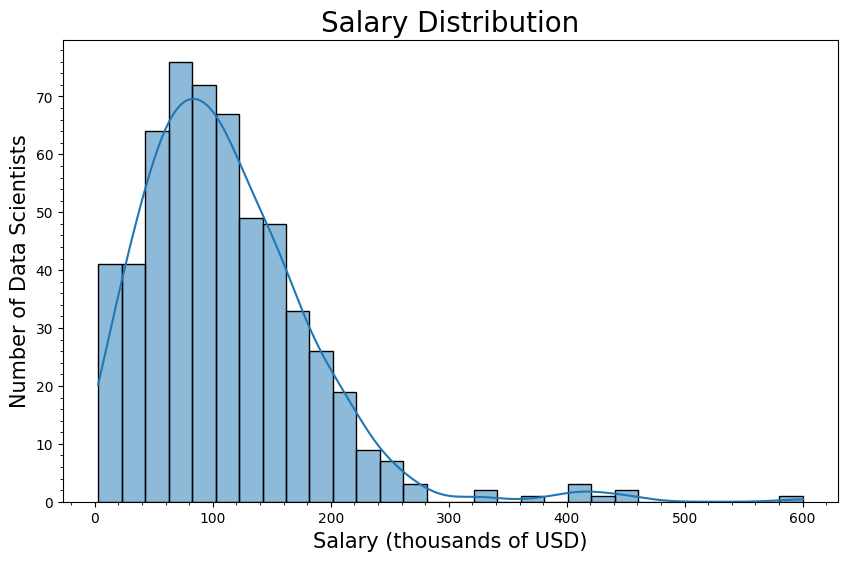

In [115]:
# Create a new column for salary in thousands
df['salary_in_k_usd'] = df['salary_in_usd'] / 1000

# Set seaborn theme and color palette

# Create histogram
plt.figure(figsize=(10,6))
sns.histplot(df['salary_in_k_usd'], bins=30, kde=True)
plt.title('Salary Distribution', fontsize=20)
plt.xlabel('Salary (thousands of USD)', fontsize=15)
plt.ylabel('Number of Data Scientists', fontsize=15)
# plt.xticks(fontsize=12)
# plt.yticks(fontsize=12)

# Add minor ticks
plt.minorticks_on()

# Turn off grid lines
plt.grid(False)

# Show plot
plt.show()


📌 Observation 

The distribution is right skewed.

The bulk of the observations are small/medium, with a few observations that are much larger than the rest. Most people earn in the low/medium range of salaries, with a few exceptions (CEOs, Executives.) that are distributed along a large range (long “tail”) of higher values.



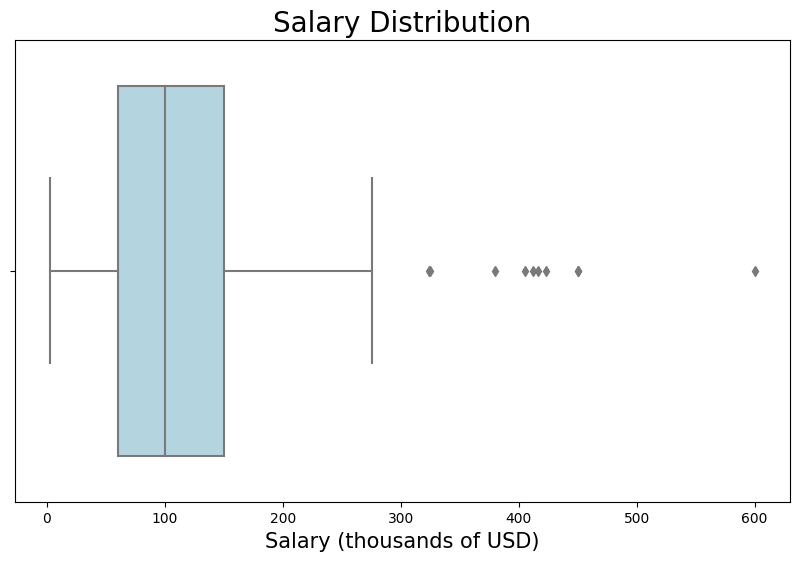

In [101]:
# Setting the size of the plot
plt.figure(figsize=(10,6))

# Creating the boxplot
sns.boxplot(x=df['salary_in_k_usd'], color='lightblue')

# Setting the labels and title
plt.xlabel('Salary (thousands of USD)', fontsize=15)
plt.title('Salary Distribution', fontsize=20)

# Turning off grid lines
plt.grid(False)

# Displaying the plot
plt.show()


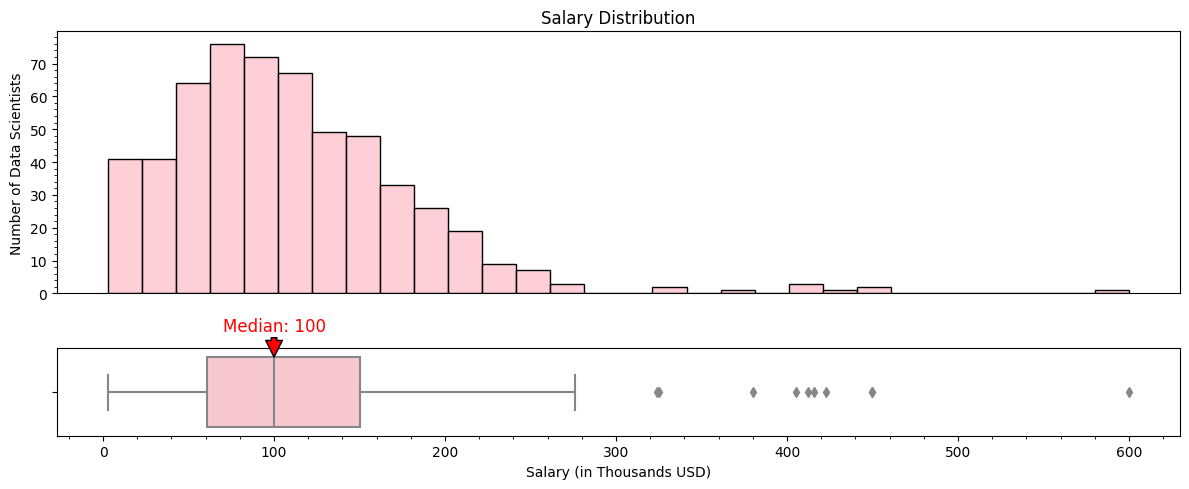

In [102]:
# Create a subplot
fig, ax = plt.subplots(2, 1, figsize=(12, 5), gridspec_kw={'height_ratios': [3, 1]}) 

# Set the histogram in the first subplot
sns.histplot(ax=ax[0], data=df, x='salary_in_k_usd', bins=30, color='pink', edgecolor='black')
ax[0].set_title('Salary Distribution')
ax[0].set_ylabel('Number of Data Scientists')
ax[0].xaxis.set_visible(False)  # Hide the x-axis
ax[0].minorticks_on()
ax[0].grid(False)

# Set the boxplot in the second subplot
sns.boxplot(ax=ax[1], data=df, x='salary_in_k_usd', color='pink', showfliers=True)
ax[1].set_xlabel('Salary (in Thousands USD)')
ax[1].minorticks_on()
ax[1].grid(False)

# Adding the median value
median_salary = df['salary_in_k_usd'].median()
ax[1].annotate(f'Median: {median_salary:.0f}',
                 xy=(median_salary, -0.4),
                 xytext=(median_salary, -0.7),
                 arrowprops=dict(facecolor='red', shrink=0), fontsize=12, color='red', ha='center')

plt.tight_layout()
plt.show()


# Experience Level

In [103]:
print(df['experience_level'].value_counts())

experience_level
Senior          243
Intermediate    208
Junior           88
Executive        26
Name: count, dtype: int64


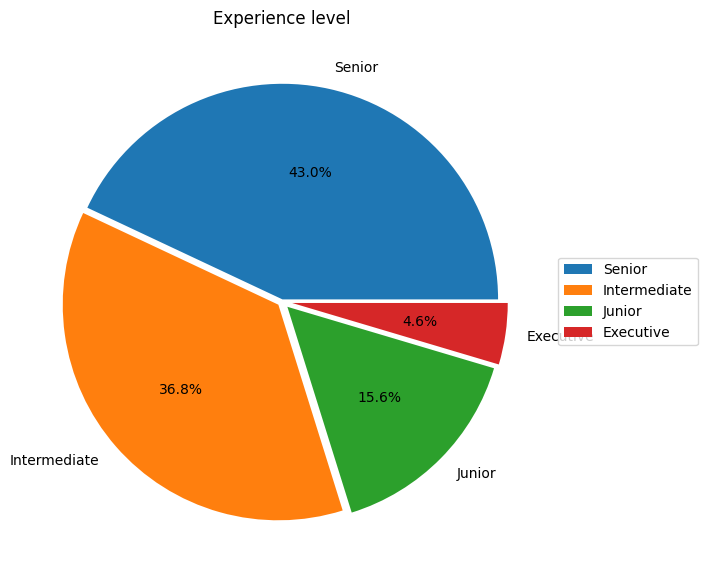

In [104]:
# Calculate counts
counts = df['experience_level'].value_counts()

# Determine explode values dynamically based on category size
explode_values = [0.01 + (0.05*i/len(counts)) for i in range(len(counts))]

# Create a new figure with specified size
plt.figure(figsize=(10,7))

# Plot a pie chart with dynamic explode values, and display the percentage of each category
ax = counts.plot(kind='pie', autopct='%1.1f%%', explode=explode_values)

# Set the title of the chart
plt.title('Experience level')

# Remove ylabel
ax.set_ylabel('')

# Add a legend to the chart, placed outside the plot
plt.legend(counts.index, loc='center left', bbox_to_anchor=(1, 0.5), fontsize=10)


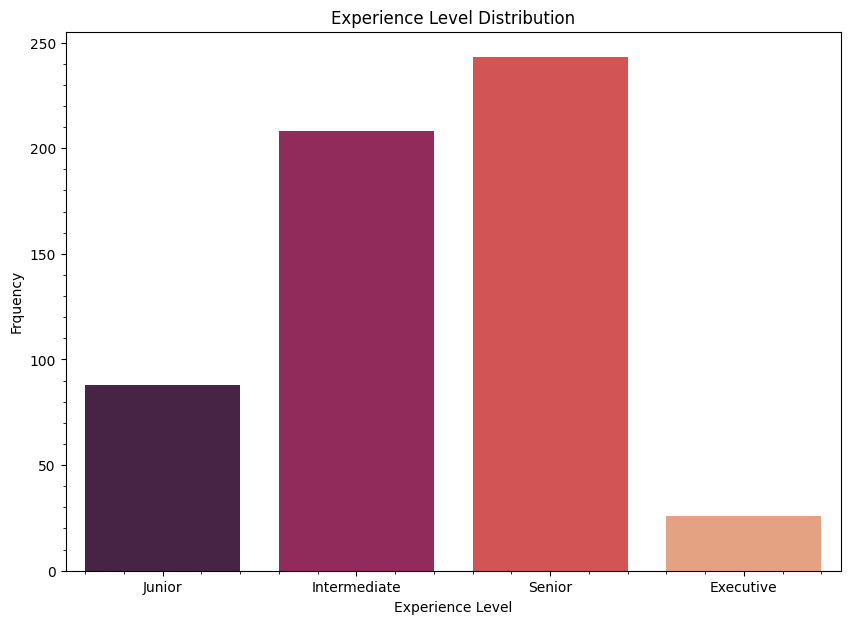

In [105]:
# Specify the order
order = ['Junior', 'Intermediate', 'Senior', 'Executive']

# Calculate counts
counts = df['experience_level'].value_counts()

# Create a new figure with specified size
plt.figure(figsize=(10,7))

# Create a color palette
color_palette = sns.color_palette("rocket", len(order))

# Plot a bar chart with the specified order and color palette
sns.barplot(x=counts.index, y=counts.values, palette=color_palette, order=order)

# Set title and labels
plt.title('Experience Level Distribution')
plt.xlabel('Experience Level')
plt.ylabel('Frquency')

# Add minor ticks on y-axis
plt.minorticks_on()

plt.show()


# Employment type

In [106]:
df['employment_type'].unique()

array(['Full Time', 'Contract', 'Part Time', 'Freelance'], dtype=object)

In [107]:
employment_type_count.plot(kind='pie', autopct='%0.1f%%', explode=[0, 0.5, 0.7, 0.9], ylabel='')

NameError: name 'employment_type_count' is not defined

In [ ]:
fig = px.pie(df.groupby('employment_type', as_index=False)['salary_in_usd'].count().sort_values(by='salary_in_usd'), 
             names='employment_type', values='salary_in_usd', color='employment_type', hole=0.6,
             labels=['Employment Type', 'Salary in USD'], template='seaborn', title='Data Science job based on salary')
fig.update_layout(title_x=0.5)

Text(0, 0.5, 'Frequency')

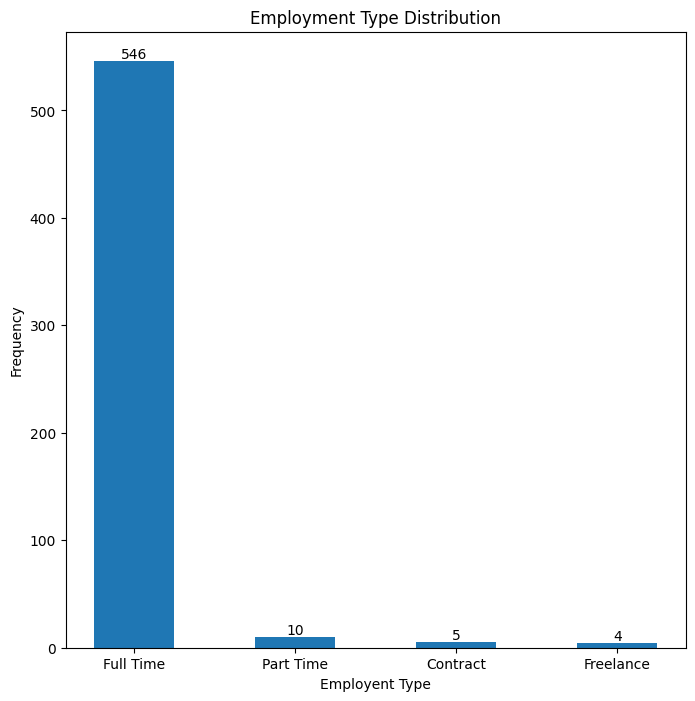

In [ ]:
# Bar chart with count
labels = df['employment_type'].value_counts().index.to_list()
values = df['employment_type'].value_counts().to_list()

# Plot Bar Chart
plt.figure(figsize=(8,8))
z = plt.bar(x=labels, height=values, width=0.5)
plt.bar_label(z, label=labels, label_type='edge')
plt.title('Employment Type Distribution')
plt.xlabel('Employent Type')
plt.ylabel('Frequency')

📌 Observation 

- Most jobs are full time, i.e. 96.6%
- Freelance jobs are rare
- Part time and Contract jobs are less than 2% of jobs

# Job Title

In [ ]:
df['job_title'].value_counts()

job_title
Data Scientist                154
Data Engineer                 142
Data Analyst                  106
Machine Learning Engineer      52
Data Science Manager           28
Research Scientist             16
Data Analytics Manager         14
Machine Learning Scientist     12
Data Architect                 12
Computer Vision Engineer       10
Data Engineering Manager        9
AI Scientist                    7
ML Manager                      2
NLP Engineer                    1
Name: count, dtype: int64

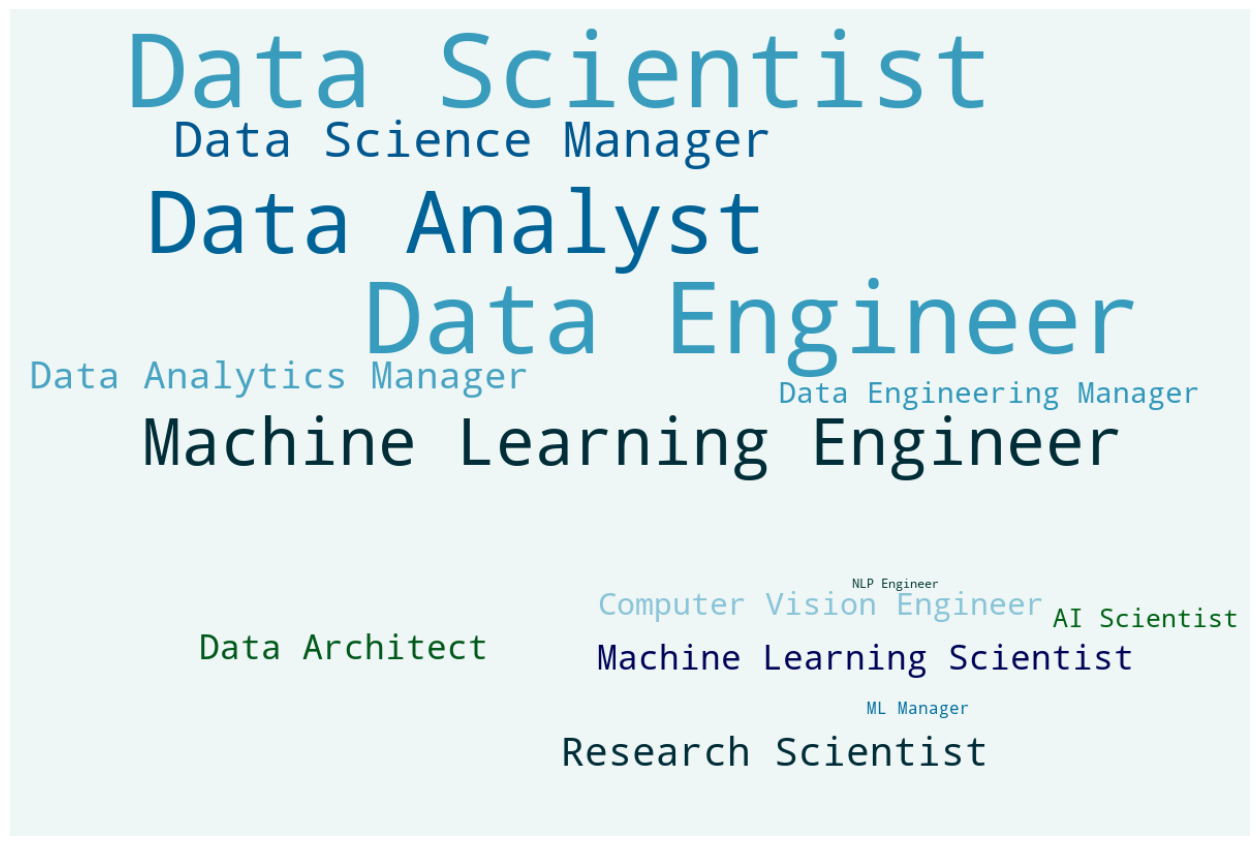

In [ ]:
# Define the frequency dataframe function
def frequency_df(wordlist):
    """
    Parameter: A list of type string.
    Returns: DataFrame with frequency distribution of strings.
    """
    freq_dist = nltk.FreqDist(wordlist)
    df_freq = pd.DataFrame.from_dict(freq_dist, orient='index')
    df_freq.columns = ['Frequency']
    df_freq.index.name = 'Title'
    df_freq = df_freq.sort_values(by=['Frequency'], ascending=False).reset_index()
    return df_freq

# Clean the data
df['job_title'] = df['job_title'].apply(lambda x: str(x) if pd.notnull(x) else '')

# Create data for WordCloud
wordlist = df['job_title'].values.tolist()
df_freq = frequency_df(wordlist)
data = dict(zip(df_freq['Title'].tolist(), df_freq['Frequency'].tolist()))

# Create WordCloud
plt.figure(figsize=(16, 12))
wc = WordCloud(width=1200,
              height=800,
              max_words=50,
              background_color='#EEF7F6',
              max_font_size=100,
              random_state=42,
              colormap='ocean').generate_from_frequencies(data)
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
job_title_counts = df['job_title'].value_counts()
job_title_counts


job_title
Data Scientist                154
Data Engineer                 142
Data Analyst                  106
Machine Learning Engineer      52
Data Science Manager           28
Research Scientist             16
Data Analytics Manager         14
Machine Learning Scientist     12
Data Architect                 12
Computer Vision Engineer       10
Data Engineering Manager        9
AI Scientist                    7
ML Manager                      2
NLP Engineer                    1
Name: count, dtype: int64

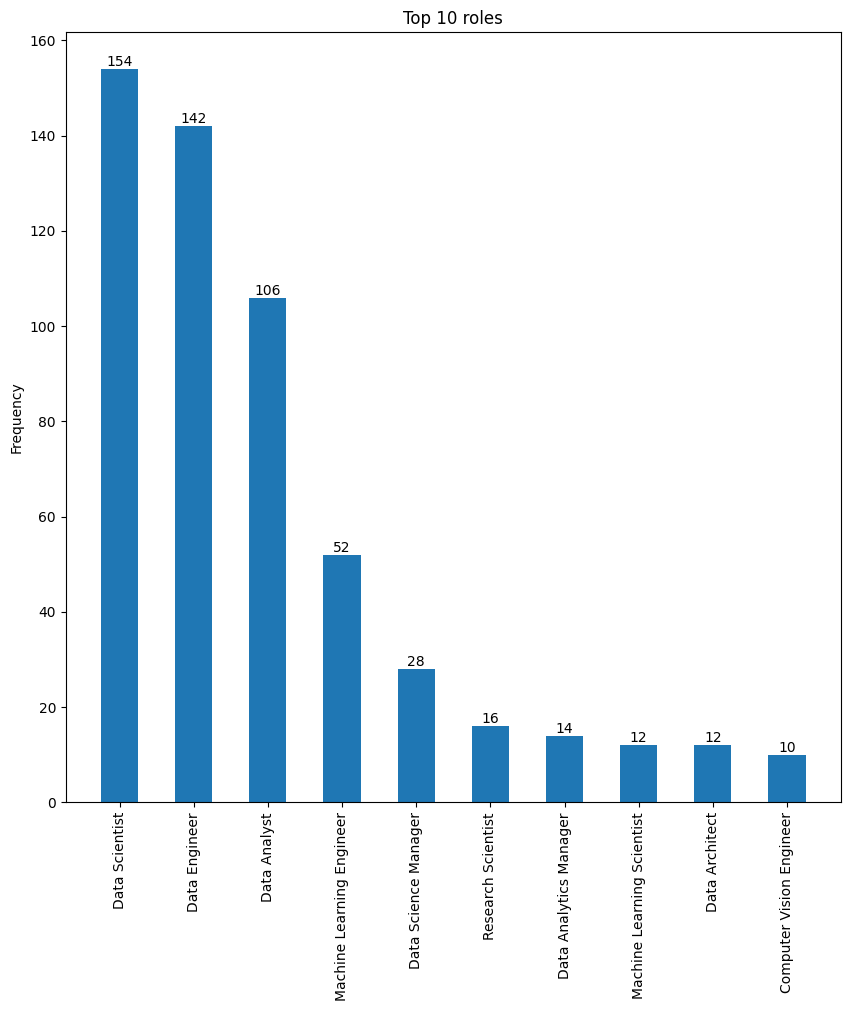

In [ ]:
# Top 10 roles
top_roles = df['job_title'].value_counts()[:10]
x = top_roles.index
y = top_roles.values

# plot bar chart
plt.figure(figsize=(10,10))
z = plt.bar(x, y, width=0.5)
plt.bar_label(z, labels=y)
plt.title('Top 10 roles')
plt.ylabel('Job title')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

<Axes: >

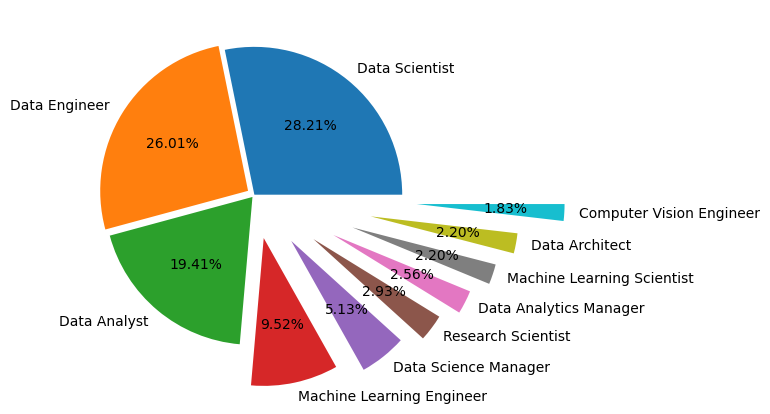

In [ ]:
top_roles.plot(kind='pie', autopct='%0.2f%%', explode=[0,0.05,0.02,0.3,0.4,0.5,0.6,0.7,0.8,1.1], ylabel='')

Text(0.5, 1.0, 'Job title')

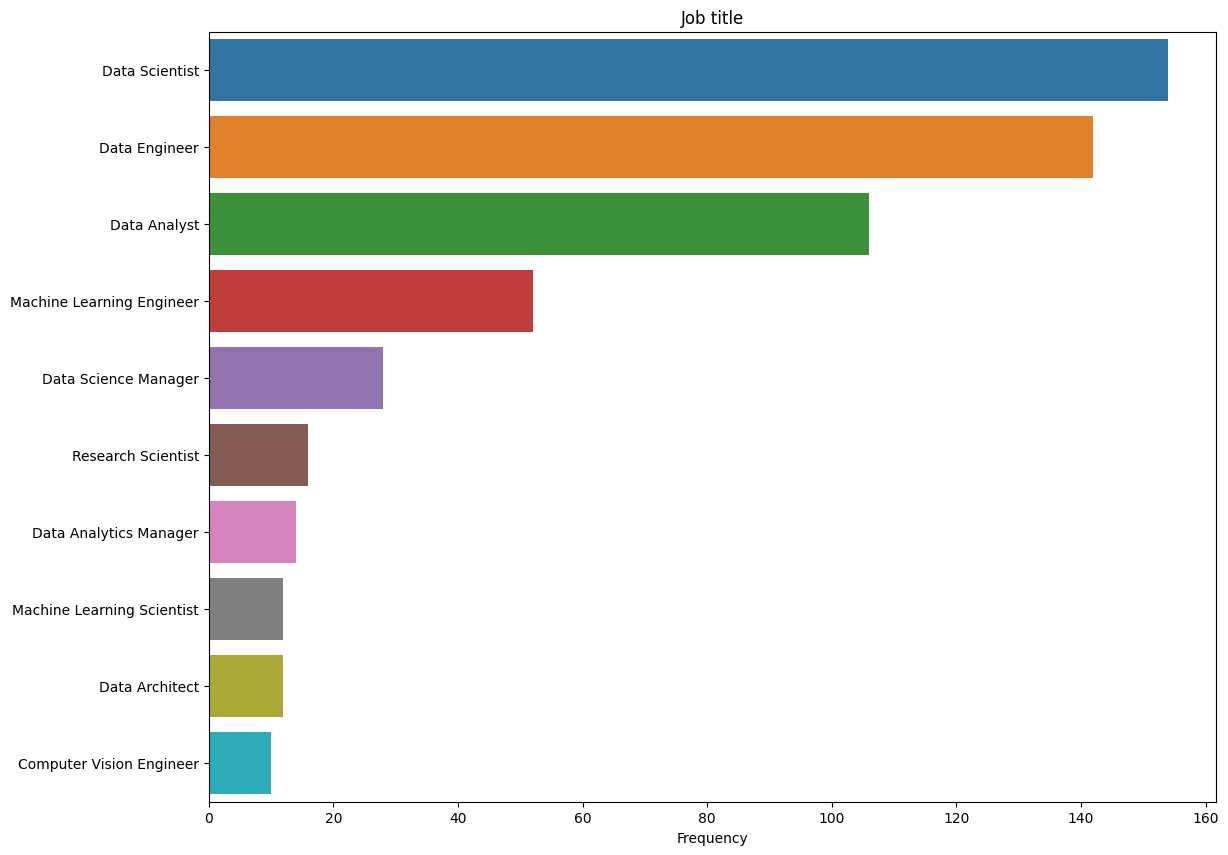

In [ ]:
plt.figure(figsize=(13,10))
sns.barplot(x=top_roles.values, y=top_roles.index)  # orient='h'
plt.xlabel('Frequency')
plt.ylabel('')
plt.title('Job title')

Text(0.5, 1.0, 'Relationship between Salary and Job Title')

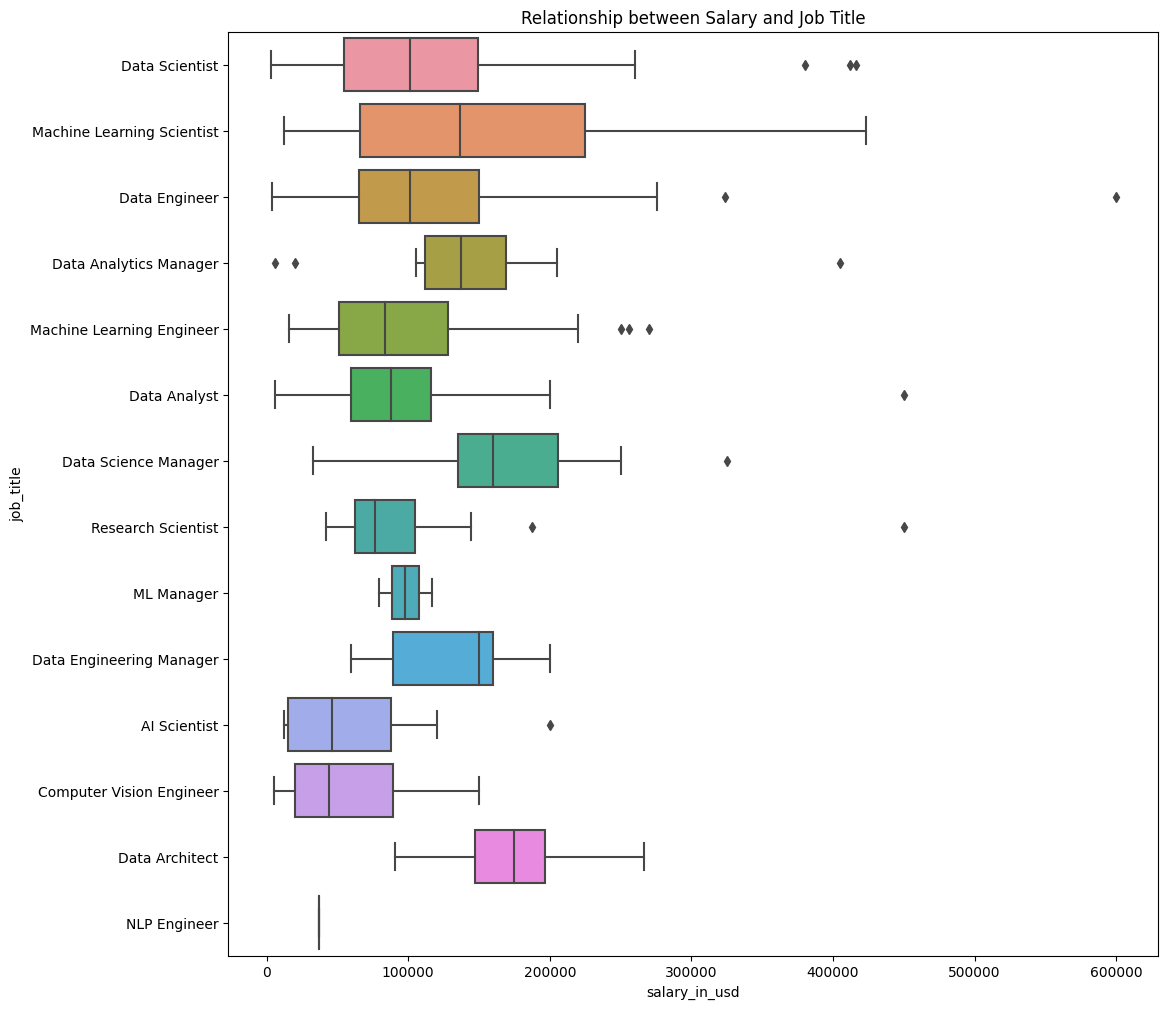

In [ ]:
# Relationship between job title and salary
plt.figure(figsize=(12, 12))
sns.boxplot(x=df['salary_in_usd'], y=df['job_title'], showfliers=True)
plt.title("Relationship between Salary and Job Title")

# Job Regions (Company Location & Employee Residence)

In [ ]:
df_grouped_company_location = (
    df
    .groupby('company_location')
    .agg(
        avg_salary=('salary_in_usd', 'mean'),
        median_salary=('salary_in_usd', 'median'),
        count=('company_location', 'count')
    )
    .reset_index()
)


In [ ]:
df_grouped_company_location

,company_location,avg_salary,median_salary,count
0,Algeria,100000.000000,100000.0,1
1,American Samoa,18053.000000,18053.0,1
2,Australia,108042.666667,87425.0,3
3,Austria,72920.750000,69489.5,4
4,Belgium,85699.000000,85699.0,2
5,Brazil,18602.666667,18907.0,3
6,Canada,100121.857143,81895.5,28
7,Chile,40038.000000,40038.0,1
8,China,71665.500000,71665.5,2
9,Colombia,21844.000000,21844.0,1


In [ ]:
# Top 15 countries having maximum Data Science Jobs
df_counts = df['company_location'].value_counts().reset_index()
df_counts.columns = ['company_location', 'employment_type']

fig = px.bar(df_counts.head(15), 
             x='employment_type', 
             y='company_location',
             title='<b> Top 15 countries having maximum Data Science Jobs',
             labels={'employment_type':'Number of Jobs', 'company_location':'Country'},
             color_discrete_sequence=['blue'],
             template='seaborn')

fig.update_yaxes(autorange="reversed")
fig.show()

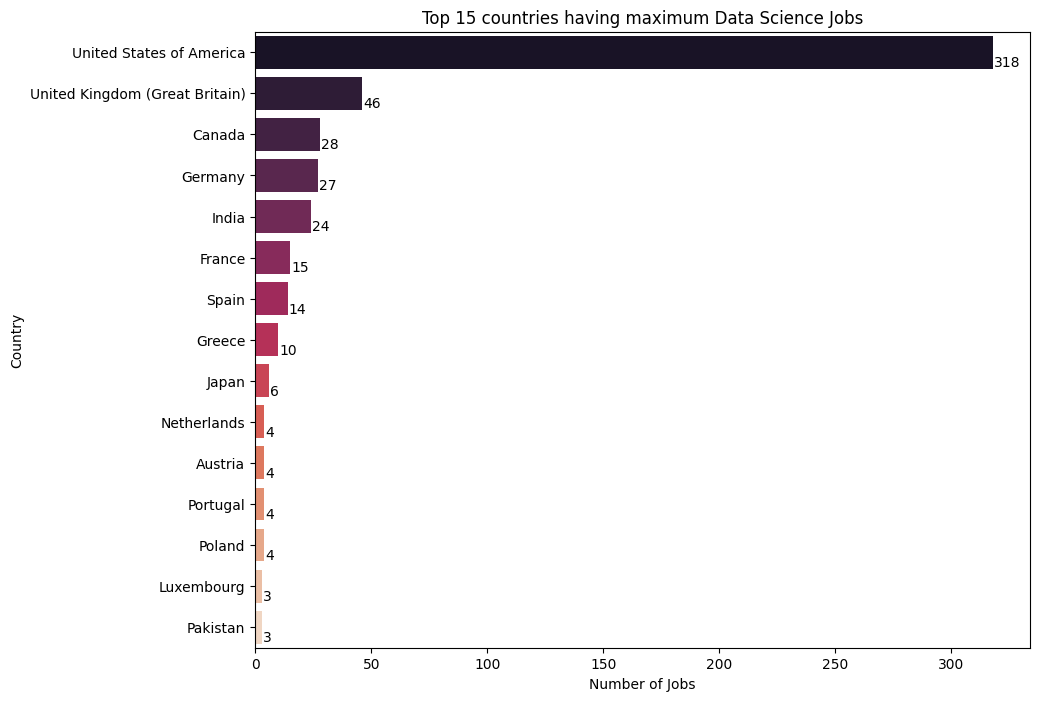

In [ ]:
# Top 15 countries having maximum Data Science Jobs
df_counts = df['company_location'].value_counts().reset_index()
df_counts.columns = ['company_location', 'employment_type']

# Sort the dataframe in ascending order
df_counts.sort_values('employment_type')

plt.figure(figsize=(10, 8))
barplot = sns.barplot(x='employment_type', 
            y='company_location', 
            data=df_counts.head(15), 
            palette='rocket', 
            orient='h')

for i, v in enumerate(df_counts.head(15)['employment_type']):
    barplot.text(v + 0.5, i + .25, str(v), color='black', va='center')

plt.title('Top 15 countries having maximum Data Science Jobs')
plt.xlabel('Number of Jobs')
plt.ylabel('Country')
plt.show()


In [ ]:
df_grouped_employee_residence = (
    df
    .groupby('employee_residence')
    .agg(
        avg_salary=('salary_in_usd', 'mean'),
        median_salary=('salary_in_usd', 'median'),
        count=('employee_residence', 'count')
    )
    .reset_index()
)


In [ ]:
df_grouped_employee_residence

,employee_residence,avg_salary,median_salary,count
0,Algeria,100000.000000,100000.0,1
1,Argentina,60000.000000,60000.0,1
2,Australia,108042.666667,87425.0,3
3,Austria,76738.666667,74130.0,3
4,Belgium,85699.000000,85699.0,2
5,Bolivia,75000.000000,75000.0,1
6,Brazil,54634.666667,21453.5,6
7,Bulgaria,80000.000000,80000.0,1
8,Canada,97191.629630,85000.0,27
9,Chile,40038.000000,40038.0,1


In [ ]:
# Top 15 countries having maximum Data Science Jobs
df_counts = df['employee_residence'].value_counts().reset_index()
df_counts.columns = ['employee_residence', 'employment_type']

fig = px.bar(df_counts.head(15), 
             x='employment_type', 
             y='employee_residence',
             title='<b> Top 15 countries having maximum Data Science Jobs',
             labels={'employment_type':'Number of Jobs', 'company_location':'Country'},
             color_discrete_sequence=['blue'],
             template='seaborn')

fig.update_yaxes(autorange="reversed")
fig.show()

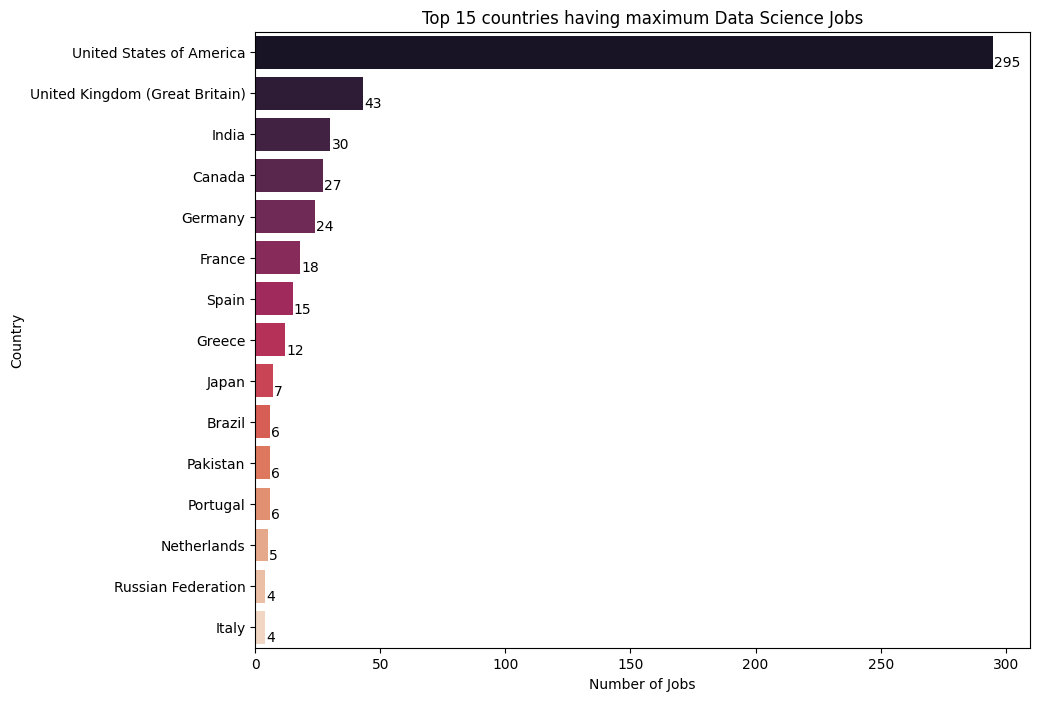

In [ ]:
# Top 15 employee residence  countries having maximum Data Science Jobs
df_counts = df['employee_residence'].value_counts().reset_index()
df_counts.columns = ['employee_residence', 'employment_type']

# Sort the dataframe in ascending order
df_counts.sort_values('employment_type')

plt.figure(figsize=(10, 8))
barplot = sns.barplot(x='employment_type', 
            y='employee_residence', 
            data=df_counts.head(15), 
            palette='rocket', 
            orient='h')

for i, v in enumerate(df_counts.head(15)['employment_type']):
    barplot.text(v + 0.5, i + .25, str(v), color='black', va='center')

plt.title('Top 15 countries having maximum Data Science Jobs')
plt.xlabel('Number of Jobs')
plt.ylabel('Country')
plt.show()


In [ ]:
# Remote Ratio

In [ ]:
df['remote_ratio'].unique()

array(['On Site', 'Partially Remote', 'Fully Remote'], dtype=object)

In [ ]:
df['remote_ratio'].value_counts()

remote_ratio
Fully Remote        346
On Site             121
Partially Remote     98
Name: count, dtype: int64

<Axes: >

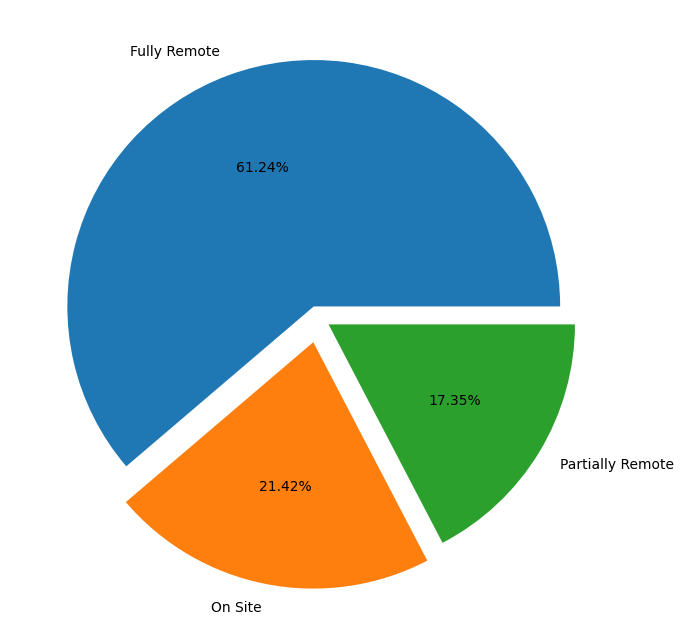

In [ ]:
plt.figure(figsize=(13, 8))
df['remote_ratio'].value_counts().plot(kind='pie', explode=[0.05, 0.1, 0.05], autopct='%0.2f%%', ylabel='')

In [108]:
# Printing the total number of rows (values) and columns (features) in the dataframe
print(f'There are {df.shape[0]} rows or values.')
print(f'There are {df.shape[1]} columns or features.')
print('*************************************')

# Separating categorical and numerical columns using select_dtypes() method
# 'object' data type is generally used for categorical columns
cat = df.select_dtypes(include = ['object'])
# Excluding 'object' data type to get numerical columns
num = df.select_dtypes(exclude = ['object'])

# Printing the number of categorical columns and their names
print(f'There are {len(cat.columns)} Categorical Columns')
print('--------------------------------------')
# Using 'enumerate' to have an automatic counter (starts from 1 in this case)
for i, col_name in enumerate(cat.columns, 1):
    print(f'{i}. {col_name}')
print('\n***************************************\n')

# Printing the number of numerical columns and their names
print(f'There are {len(num.columns)} Numerical Columns')
print('--------------------------------------')
# Using 'enumerate' to have an automatic counter (starts from 1 in this case)
for i, col_name in enumerate(num.columns, 1):
    print(f'{i}. {col_name}')


There are 565 rows or values.
There are 10 columns or features.
*************************************
There are 7 Categorical Columns
--------------------------------------
1. experience_level
2. employment_type
3. job_title
4. employee_residence
5. remote_ratio
6. company_location
7. company_size

***************************************

There are 3 Numerical Columns
--------------------------------------
1. work_year
2. salary_in_usd
3. salary_in_k_usd


In [109]:
cat

,experience_level,employment_type,job_title,employee_residence,remote_ratio,company_location,company_size
0,Intermediate,Full Time,Data Scientist,Germany,On Site,Germany,Large
1,Senior,Full Time,Machine Learning Scientist,Japan,On Site,Japan,Small
2,Senior,Full Time,Data Engineer,United Kingdom (Great Britain),Partially Remote,United Kingdom (Great Britain),Medium
3,Intermediate,Full Time,Data Analytics Manager,Honduras,On Site,Honduras,Small
4,Senior,Full Time,Machine Learning Engineer,United States of America,Partially Remote,United States of America,Large
...,...,...,...,...,...,...,...
602,Senior,Full Time,Data Engineer,United States of America,Fully Remote,United States of America,Medium
603,Senior,Full Time,Data Engineer,United States of America,Fully Remote,United States of America,Medium
604,Senior,Full Time,Data Analyst,United States of America,On Site,United States of America,Medium
605,Senior,Full Time,Data Analyst,United States of America,Fully Remote,United States of America,Medium


In [110]:
num

,work_year,salary_in_usd,salary_in_k_usd
0,2020,79833,79.833
1,2020,260000,260.000
2,2020,109024,109.024
3,2020,20000,20.000
4,2020,150000,150.000
...,...,...,...
602,2022,154000,154.000
603,2022,126000,126.000
604,2022,129000,129.000
605,2022,150000,150.000


In [117]:
df.to_csv('data/cleaned_data_science_jobs.csv')

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 565 entries, 0 to 606
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   work_year           565 non-null    int64  
 1   experience_level    565 non-null    object 
 2   employment_type     565 non-null    object 
 3   job_title           565 non-null    object 
 4   salary_in_usd       565 non-null    int64  
 5   employee_residence  563 non-null    object 
 6   remote_ratio        565 non-null    object 
 7   company_location    565 non-null    object 
 8   company_size        565 non-null    object 
 9   salary_in_k_usd     565 non-null    float64
dtypes: float64(1), int64(2), object(7)
memory usage: 48.6+ KB
